# Find **ori** of *Salmonella enterica*
지금까지 *ori*를 찾기 위해 다양한 시도들을 수행했었다.
1. Pattern의 빈도
2. Clumps의 형성
3. Skewness 확인

이번 노트에서는, *S. enterica*의 genome 데이터를 통해 주어진 단서들이 어떻게 *ori*를 실제로 찾을 수 있게 하는지 확인해보고자 한다.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 파일 읽어오기
path = "./Salmonella_enterica.txt"
f = open(path, 'r')
contents = f.readlines()
genome = ''
for idx in range(1, len(contents)):
    genome += contents[idx].strip()

## Pattern in Genome
- Genome에 빈번하게 등장하는 Pattern을 찾음으로써 *ori*가 등장하는 영역을 확인해보고자 한다.
- 자주 등장하는 K-mer를 찾고, 등장한 횟수를 관찰
- mismatches를 허용할 경우 등장 빈도가 가장 높은 경우 관찰

In [3]:
from FrequentWords import FasterFrequentWords, findMostFrequentPatternWithMismatches

In [38]:
class maxFrequency:
    def __init__(self):
        self.k = 0
        self.pattern = set()
        self.maxCount = 0
        self.d = 0
        self.isReverse = False

In [40]:
frequentKmerList = [maxFrequency() for _ in range(10)]
for idx in range(0, 10):
    k = idx + 5
    pattern, maxCount = FasterFrequentWords(genome, k)
    frequentKmerList[idx].k = k
    frequentKmerList[idx].pattern = set(pattern)
    frequentKmerList[idx].maxCount = maxCount

In [44]:
for idx in range(0, 10):
    print(f"{frequentKmerList[idx].k}-mer, {frequentKmerList[idx].pattern}, {frequentKmerList[idx].maxCount}")

5-mer, {'CGGCG'}, 16408
6-mer, {'CTGGCG'}, 6473
7-mer, {'GCTGGCG'}, 2924
8-mer, {'CGCTGGCG'}, 1210
9-mer, {'GCGCTGGCG'}, 490
10-mer, {'CGCCAGCGCC'}, 192
11-mer, {'CGCCATCCGGC'}, 108
12-mer, {'CGCCATCCGGCA'}, 80
13-mer, {'GTAGGCCGGATAA'}, 68
14-mer, {'GTAGGCCGGATAAG'}, 64


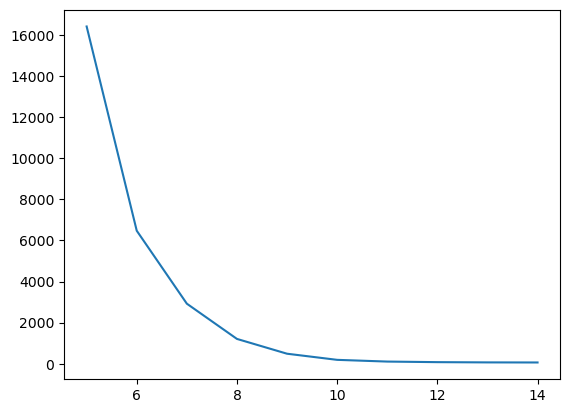

In [ ]:
KmerAxis, KmerCounts = [], []

for idx in range(len(frequentKmerList)):
    KmerAxis.append(frequentKmerList[idx].k)
    KmerCounts.append(frequentKmerList[idx].maxCount)
    
plt.plot(KmerAxis, KmerCounts)
plt.title('Max Counts of Most Frequent k-mer')
plt.xlabel('K for k-mer')
plt.ylabel('Max Counts for each k-mer')

In [46]:
frequentKKmerList = [maxFrequency() for _ in range(10 * 45)]
for idx in range(0, 10):
    k = idx + 5
    
    # mismatch를 0% ~ k-mer의 절반까지 허용할 경우
    for d in range(k // 2):
        
        # Reverse Complement를 포함하지 않는 경우
        pattern, maxCount = findMostFrequentPatternWithMismatches(genome, k, d)
        frequentKKmerList[idx].k = k
        frequentKKmerList[idx].pattern = set(pattern)
        frequentKKmerList[idx].maxCount = maxCount
        frequentKKmerList[idx].d = d
        frequentKKmerList[idx].isReverse = False

KeyboardInterrupt: 

In [ ]:
for idx in range(450):
    print(f"{frequentKKmerList[idx].k}-mer, {frequentKKmerList[idx].pattern}, {frequentKKmerList[idx].maxCount}, {frequentKKmerList[idx].d}")

In [ ]:
RfrequentKKmerList = [maxFrequency() for _ in range(10 * 45)]
for idx in range(0, 10):
    k = idx + 5
    
    # mismatch를 0% ~ k-mer의 절반까지 허용할 경우
    for d in range(k // 2):
        
        # Reverse Complement를 포함하는 경우
        pattern, maxCount = findMostFrequentPatternWithMismatches(genome, k, d, True)
        RfrequentKKmerList[idx].k = k
        RfrequentKKmerList[idx].pattern = set(pattern)
        RfrequentKKmerList[idx].maxCount = maxCount
        RfrequentKKmerList[idx].d = d
        RfrequentKKmerList[idx].isReverse = True

In [ ]:
for idx in range(450):
    print(f"{RfrequentKKmerList[idx].k}-mer, {RfrequentKKmerList[idx].pattern}, {RfrequentKKmerList[idx].maxCount}, {RfrequentKKmerList[idx].d}, {RfrequentKKmerList[idx].isReverse}")

## Find Clumps
- 임의의 크기인 window 내에서 얼마나 빈번한 pattern이 밀도 높게 등장하는지 확인
    - 다만, window의 size를 정하는 것은 다소 heuristic 할 수 있음.
    - 논문이나 외부 추가 정보를 통해 접근하는 방법


In [33]:
# G-C ratio check
dictGC = {'G': 1, 'C': -1, 'A': 0, 'T': 0}
distributionGC = []

distributionGC.extend(dictGC.get(base) for base in genome)
distributionGC = np.array(distributionGC)

np.shape(distributionGC)

(4809037,)

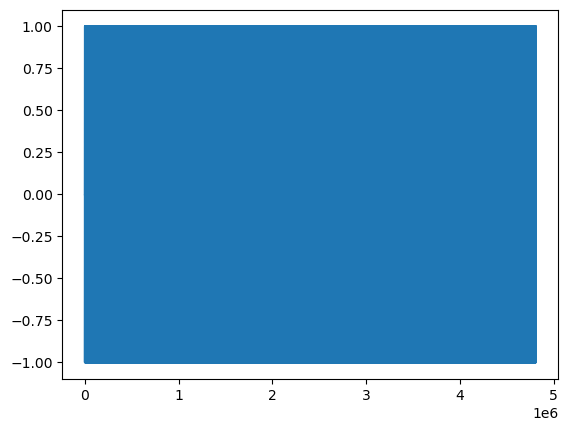

In [34]:
fig, ax = plt.subplots()
x = np.linspace(0, len(genome), len(genome))
ax.plot(x, distributionGC)
plt.show()

In [35]:
f.close()